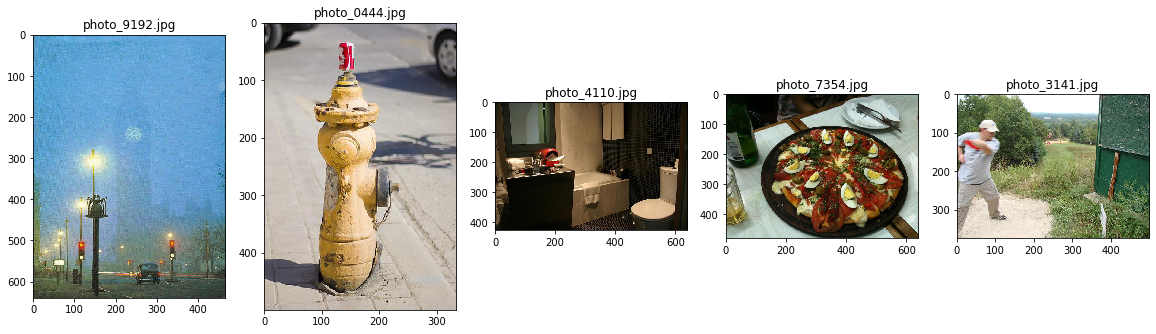

Found 41396 files belonging to 5 classes.
Using 8279 files for validation.
Found 41396 files belonging to 5 classes.
Using 33117 files for training.
['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']


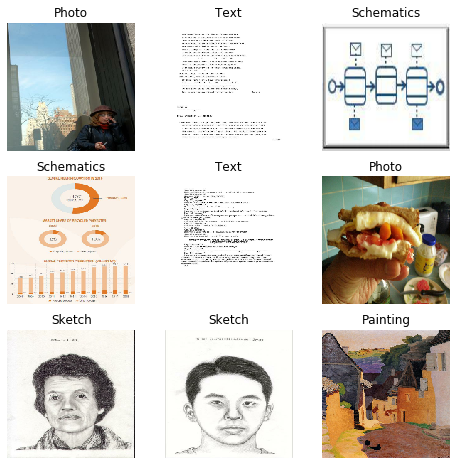

(32, 180, 180, 3)
(32,)


In [2]:
%run img_loading.ipynb

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

ds_train = ds_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
ds_test = ds_test.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
num_classes = 5 # Nombre de classes et donc aussi nombre de neurones dans la dernière couche
model = tf.keras.models.Sequential()

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, offset=0),
  tf.keras.layers.Conv2D(32, [3,3], activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(8, [3,3], activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [13]:
model.add(layers.experimental.preprocessing.Rescaling(
    #A COMPLETER
    scale=1.0/255,
    offset=0,
    )
)

In [14]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
1035/1035 [==============================] - 385s 299ms/step - loss: 0.7782 - accuracy: 0.6450 - val_loss: 0.5399 - val_accuracy: 0.7660
Epoch 2/10
1035/1035 [==============================] - 311s 301ms/step - loss: 0.5161 - accuracy: 0.7715 - val_loss: 0.4648 - val_accuracy: 0.8014
Epoch 3/10
1035/1035 [==============================] - 354s 342ms/step - loss: 0.4508 - accuracy: 0.8010 - val_loss: 0.4391 - val_accuracy: 0.8151
Epoch 4/10
1035/1035 [==============================] - 375s 363ms/step - loss: 0.4090 - accuracy: 0.8238 - val_loss: 0.4149 - val_accuracy: 0.8256
Epoch 5/10
1035/1035 [==============================] - 374s 361ms/step - loss: 0.3756 - accuracy: 0.8426 - val_loss: 0.3706 - val_accuracy: 0.8415
Epoch 6/10
1035/1035 [==============================] - 370s 358ms/step - loss: 0.3431 - accuracy: 0.8568 - val_loss: 0.3370 - val_accuracy: 0.8660
Epoch 7/10
1035/1035 [==============================] - 366s 354ms/step - loss: 0.3161 - accuracy: 0.8696 - val_

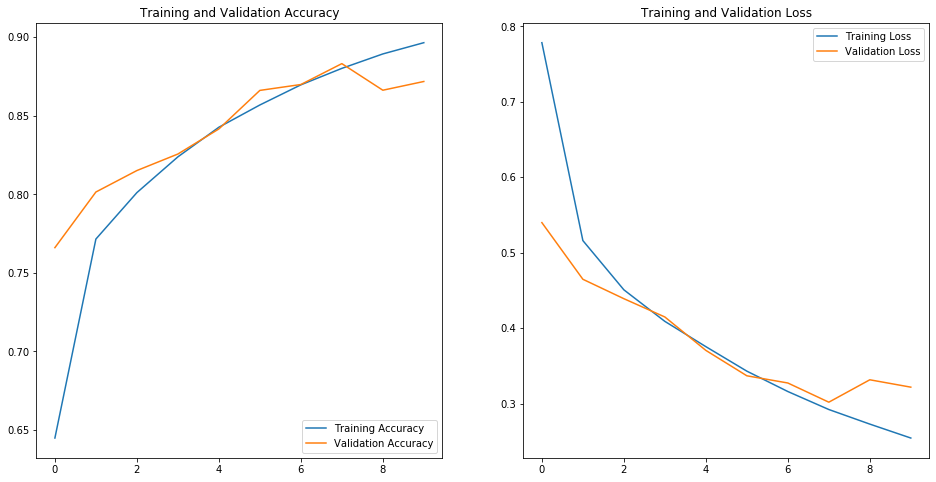

In [15]:
epochs=10

history = model.fit(ds_train,
                    validation_data=ds_test,
                    epochs=epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
model.save(filepath="model1.h5",
           overwrite=True,
           include_optimizer=True,
           save_format=None,
           signatures=None,
           options=None,
           save_traces=True
)

In [5]:
model = tf.keras.models.load_model('model1.h5')

In [8]:
test_loss, test_acc = model.evaluate(ds_test, verbose=2)

print('\nTest accuracy:', test_acc)

259/259 - 156s - loss: 0.3219 - accuracy: 0.8717

Test accuracy: 0.8717236518859863


In [9]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [10]:
predictions = probability_model.predict(ds_test)

In [11]:
predictions[0]

array([7.2684938e-01, 2.7288494e-01, 2.6564320e-04, 2.4083116e-11,
       3.9886774e-11], dtype=float32)

In [12]:
np.argmax(predictions[0])

0